In [4]:
import sys
import pandas
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
from numpy import diff
import os
warnings.filterwarnings('ignore')
cmap = plt.get_cmap('twilight')

sys.setrecursionlimit(10000) 

In [5]:
def dfs(graph, start, visited):
    visited.add(start)
    count = 1  # Count the starting node
    for neighbor in graph[start]:
        if neighbor not in visited:
            count += dfs(graph, neighbor, visited)  # Add count from neighbors
    return count

def build_graph(edges):
    graph = {}
    for edge in edges:
        a, b = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)  # Omit this line for a directed graph
    return graph

def build_graphWithTypes(edges,T):
    graph = {}
    i==0
    for edge in edges:
        a, b, t = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        if t==T:
            graph[a].append(b)
            graph[b].append(a)  # Omit this line for a directed graph
    return graph

def largest_connected_component(graph):
    visited = set()
    largest = 0
    for node in graph:
        if node not in visited:
            size = dfs(graph, node, visited)
            largest = max(largest, size)
    return largest

def is_connected(graph, nodes):
    visited = set()
    dfs(graph, next(iter(graph)), visited)
    return len(visited) == len(nodes)

def find_connected_components(graph, nodes):
    visited = set()
    num_components = 0
    for node in nodes:
        if node not in visited:
            dfs(graph, node, visited)
            num_components += 1
    return num_components
    
def calculate_average_degree(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graph)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree

def calculate_average_degree7sNc1(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graph)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree

In [8]:
my_path = '/Users/billiemeadowcroft/Dropbox/Collagen/RicardoProject/GithubCode/Analysis/example_bonds/'


# An example for fetching some properties of our networks from the lammps outputs: dumplin_bonds/bonds.run_t1.*

In [11]:
foldernameBONDS = my_path
files = [f for f in os.listdir(foldernameBONDS) if os.path.isfile(os.path.join(foldernameBONDS, f))]
connectedsubgraphsNR = []
timeNR = []
LargestCompNR = []
AvDegreeNR = []
AvDegreeNR1 = []
AvDegreeNR2 = []
AvDegreeNR3 = []
frame = 2040
#foldernameBONDS = datadir+'runCluster_tmix1e4_tbonds1e5_tstretch1e4_trelax1e5_N_fix500_XStretch72_Nev500_ChemBond4.0_prob0.1_seed2/dumplin_bonds/'
files = [f for f in os.listdir(foldernameBONDS) if os.path.isfile(os.path.join(foldernameBONDS, f))]
numnodes = 6250
# Sort the list of files
files.sort()
count = 0
i=0
for file_name in files:
    i+1
    file_path = os.path.join(foldernameBONDS, file_name)
    bonds_ = pandas.read_csv(file_path, header = None,skiprows =9, usecols = [1,2], sep=' ')
    bonds2_ = pandas.read_csv(file_path, header = None,skiprows =9, usecols = [1,2,3], sep=' ')
    bonds = bonds_.values
    edges = bonds  # list of edges
    edges2 = bonds2_.values
    graph = build_graph(edges)

    nodes = np.arange(1,numnodes+1,1)  # list of nodes
    timeNR.append(i*frame)
    i+=1
    connectedsubgraphsNR.append(find_connected_components(graph, nodes))
    LargestCompNR.append(largest_connected_component(graph))
    AvDegreeNR.append((calculate_average_degree(graph)))



## Plotting out properties

Text(0, 0.5, 'Average degree per node')

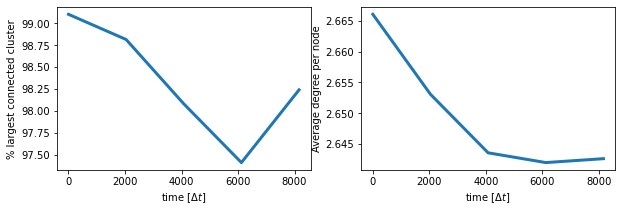

In [14]:
fig,ax = plt.subplots(1,2,figsize = (10,3))

ax[0].plot(timeNR,np.divide(LargestCompNR,numnodes*0.01),linewidth = 3)
ax[1].plot(timeNR,AvDegreeNR,linewidth = 3)
ax[0].set_ylabel(r'% largest connected cluster')
ax[0].set_xlabel(r'time [$\Delta t$]')
ax[1].set_xlabel(r'time [$\Delta t$]')
ax[1].set_ylabel(r'Average degree per node')
fig.tight_layout()

In [ ]:
#This cell takes some time to run, don't run unless you need to know which networks have broken!
ChemEngs = "3.0 4.0 5.0 6.0 7.0 100.0".split() # 5.0 6.0 7.0
xStretches = "72 108 144".split()
seeds = "1 2 3 4 5".split()
fig2,ax2 = plt.subplots(1,len(xStretches),figsize = (12,4))
for e in range(1): #len(ChemEngs)
    e = 5
    for x in range(len(xStretches)):
        for s in range(len(seeds)):
            foldernameBONDS = datadir+'runBONDprinting_tmix1e4_tbonds1e5_tstretch1e4_trelax5e5_N_fix100_XStretch'+xStretches[x]+'_Nev500_ChemBond'+ChemEngs[e]+'_prob0.1_seed1/dumplin_bonds/'
            print(ChemEngs[e],xStretches[x],seeds[s])
            connectedsubgraphsNR = []
            timeNR = []
            LargestCompNR = []
            AvDegreeNR = []
            AvDegreeNR1 = []
            AvDegreeNR2 = []
            AvDegreeNR3 = []
            frame = 2040
            #foldernameBONDS = datadir+'runCluster_tmix1e4_tbonds1e5_tstretch1e4_trelax1e5_N_fix500_XStretch72_Nev500_ChemBond4.0_prob0.1_seed2/dumplin_bonds/'
            files = [f for f in os.listdir(foldernameBONDS) if os.path.isfile(os.path.join(foldernameBONDS, f))]
            numnodes = 6250
            # Sort the list of files
            files.sort()
            count = 0
            i=0
            for file_name in files:
                if i%(int(len(files)/10))==0:
                    print("proc 2/2 "+str(i*100/len(files)) +"% done")
                i+1
                file_path = os.path.join(foldernameBONDS, file_name)
                bonds_ = pandas.read_csv(file_path, header = None,skiprows =9, usecols = [1,2], sep=' ')
                bonds2_ = pandas.read_csv(file_path, header = None,skiprows =9, usecols = [1,2,3], sep=' ')
                bonds = bonds_.values
                edges = bonds  # list of edges
                edges2 = bonds2_.values
                graph = build_graph(edges)
                graph1 = build_graphWithTypes(edges2,1)
                graph2 = build_graphWithTypes(edges2,2)
                graph3 = build_graphWithTypes(edges2,3)
                nodes = np.arange(1,numnodes+1,1)  # list of nodes
                timeNR.append(i*frame)
                i+=1
                connectedsubgraphsNR.append(find_connected_components(graph, nodes))
                LargestCompNR.append(largest_connected_component(graph))
                AvDegreeNR.append((calculate_average_degree(graph)))
                AvDegreeNR1.append((calculate_average_degree(graph1)))
                AvDegreeNR2.append((calculate_average_degree(graph2)))
                AvDegreeNR3.append((calculate_average_degree(graph3)))

            LargestComps[e,x,s] = LargestCompNR[-1]
        ax2[x].plot(timeNR,np.divide(LargestCompNR,numnodes*0.01),linewidth = 3,label = ChemEngs[e]+' '+seeds[s])
        
ax2[0].legend(frameon=False)